<a href="https://colab.research.google.com/github/vikaspathak0911/Plant-Disease-Predication/blob/main/plantDieseasePridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing the Dependencies**

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


**Data Curation**


Upload the Keggle JSON File

In [ ]:
!pip install kaggle

In [ ]:
kaggle_credentials = json.load(open("kaggle.json"))

In [ ]:
# Setup Kaggle  API as  environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdallahalidev/plantvillage-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.04G/2.04G [00:18<00:00, 120MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/abdallahalidev/plantvillage-dataset/versions/3


In [ ]:
print(os.listdir("/root/.cache/kagglehub/datasets/abdallahalidev/plantvillage-dataset/versions/3/plantvillage dataset"))

print(len(os.listdir("/root/.cache/kagglehub/datasets/abdallahalidev/plantvillage-dataset/versions/3/plantvillage dataset/segmented")))
print(os.listdir("/root/.cache/kagglehub/datasets/abdallahalidev/plantvillage-dataset/versions/3/plantvillage dataset/segmented")[:5])

print(len(os.listdir("/root/.cache/kagglehub/datasets/abdallahalidev/plantvillage-dataset/versions/3/plantvillage dataset/color")))
print(os.listdir("/root/.cache/kagglehub/datasets/abdallahalidev/plantvillage-dataset/versions/3/plantvillage dataset/color")[:5])

print(len(os.listdir("/root/.cache/kagglehub/datasets/abdallahalidev/plantvillage-dataset/versions/3/plantvillage dataset/grayscale")))
print(os.listdir("/root/.cache/kagglehub/datasets/abdallahalidev/plantvillage-dataset/versions/3/plantvillage dataset/grayscale")[:5])

['color', 'grayscale', 'segmented']
38
['Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Potato___Late_blight', 'Strawberry___Leaf_scorch']
38
['Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Potato___Late_blight', 'Strawberry___Leaf_scorch']
38
['Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Potato___Late_blight', 'Strawberry___Leaf_scorch']


In [ ]:
print(len(os.listdir("/root/.cache/kagglehub/datasets/abdallahalidev/plantvillage-dataset/versions/3/plantvillage dataset/color/Grape___healthy")))
print(os.listdir("/root/.cache/kagglehub/datasets/abdallahalidev/plantvillage-dataset/versions/3/plantvillage dataset/color/Grape___healthy")[:5])

423
['a47c4d69-8888-45dd-93bf-8f3421960604___Mt.N.V_HL 9082.JPG', '9c9ae952-4031-4fb0-9f79-fc9272a7a1fa___Mt.N.V_HL 6141.JPG', '811f5365-f5a3-4659-8302-009fb5275541___Mt.N.V_HL 8946.JPG', '084c897b-172c-4263-8d46-c6a629449c60___Mt.N.V_HL 9045.JPG', 'acfa3deb-4d93-4afa-bbfb-94ac8e442545___Mt.N.V_HL 9119.JPG']


In [ ]:
#Dataset Path
#Dataset Path
base_dir = '/root/.cache/kagglehub/datasets/abdallahalidev/plantvillage-dataset/versions/3/plantvillage dataset/color' # Corrected path to the dataset

(256, 256, 3)


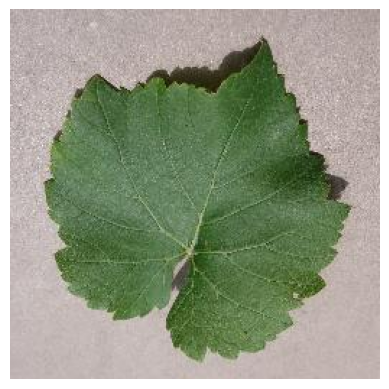

In [ ]:
image_path = "/root/.cache/kagglehub/datasets/abdallahalidev/plantvillage-dataset/versions/3/plantvillage dataset/color/Grape___healthy/0eb2593a-5e67-4f13-91ea-105831323d54___Mt.N.V_HL 6117.JPG"

#Read the image
img = mpimg.imread(image_path)

print(img.shape)
#Display the Image

plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
#Image Parameters
img_size = 224
batch_size = 32

**Train Test Split**

In [ ]:
#Image Data Generators
data_gen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2 # use use 20% of data for validation
)

In [ ]:
#Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    subset = 'training',
    class_mode = 'categorical'
)

Found 43456 images belonging to 38 classes.


In [ ]:
#Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    subset = 'validation',
    class_mode = 'categorical'
)

Found 10849 images belonging to 38 classes.


**Convolutional Neural Network**

In [ ]:
#Model Defination
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (img_size,img_size,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation = 'relu'))
model.add(layers.Dense(train_generator.num_classes, activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Compile the Model
model.compile(
            loss = 'categorical_crossentropy',
            metrics = ['accuracy']
)

**Model Training**

In [ ]:
#Taining the Model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size, #Number of the Steps per epoch
    epochs = 10, # Number of epochs
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size #Validation Steps
)

Epoch 1/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 96s 70ms/step - accuracy: 0.8898 - loss: 0.3557 - val_accuracy: 0.8752 - val_loss: 0.4141
Epoch 2/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 139s 68ms/step - accuracy: 0.9522 - loss: 0.1582 - val_accuracy: 0.8813 - val_loss: 0.4913
Epoch 3/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 92s 68ms/step - accuracy: 0.9723 - loss: 0.1021 - val_accuracy: 0.8948 - val_loss: 0.5399
Epoch 4/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 139s 66ms/step - accuracy: 0.9753 - loss: 0.0838 - val_accuracy: 0.8759 - val_loss: 0.8511
Epoch 5/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 89s 66ms/step - accuracy: 0.9785 - loss: 0.0833 - val_accuracy: 0.8779 - val_loss: 0.8210
Epoch 6/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 144s 67ms/step - accuracy: 0.9803 - loss: 0.0834 - val_accuracy: 0.8515 - val_loss: 1.2301
Epoch 7/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 90s 66ms/step - accuracy: 0.9822 - loss: 0.0798 - val_accuracy: 0.8715 - val_loss: 1.1385
Epoch 8/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 202s 110ms/step - accuracy: 0.9

**Model Evaluation**

In [ ]:
#Model Evaluation
print("Evaluation model..........")
var_loss, val_accuracy = model.evaluate(validation_generator, steps = validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")


Evaluation model..........
339/339 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - accuracy: 0.8683 - loss: 1.8587
Validation Accuracy: 86.97%


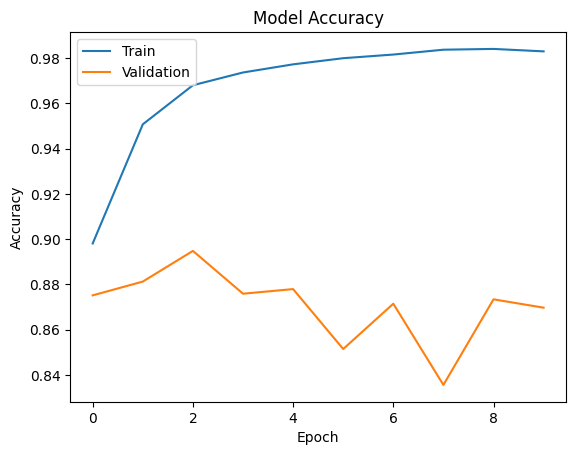

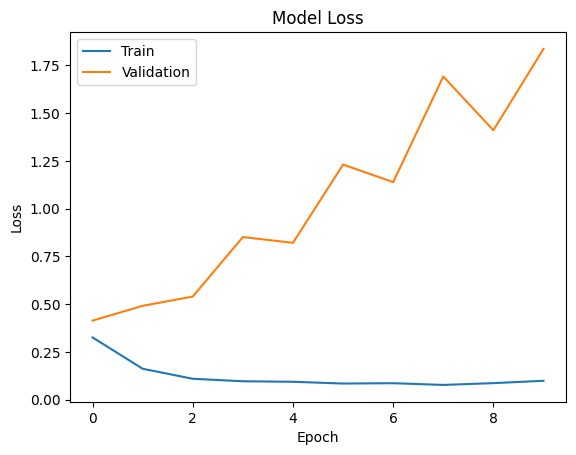

In [ ]:
#Ploat training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#Ploat training and validation loss vaues
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Building Predective System**


In [ ]:
#Fuction to laod and preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size = (224,224)):
  #Load the Image
    img = Image.open(image_path)
  #Resize the Image
    img = img.resize(target_size)
  #convert the Image into NumPy Array
    img_array = np.array(img)
  #Add batch dimension
    img_array = np.expand_dims(img_array, axis = 0)
  #Scale the Image value to [0,1]
    img_array = img_array.astype('float32') / 255.0
    return img_array

#Function to predict the class of an Image
def predict_image_class(model, image_path, class_indices):
  preprocessed_image = load_and_preprocess_image(image_path)
  predictions = model.predict(preprocessed_image)
  predicted_class_index = np.argmax(predictions, axis = 1)[0]
  predicted_class_name = class_indices[predicted_class_index]
  return predicted_class_name

In [ ]:
#Create a mapping from class indices to class name:
class_indices = {V: k for k, V in train_generator.class_indices.items()}

In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
#Saving the class name as JSON file
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
#Example Usages
#image_path = '/content/test_apple_black_rot.jpg'
#image_path = '/content/test_blueberry_healthly.jpg'
#image_path = '/content/test_potato_early_bright.jpg'
image_path = '/content/test1.jpg'

predicted_class_name =  predict_image_class(model, image_path, class_indices)

#Output the result
print(f"The Image belongs to class: {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The Image belongs to class: Corn_(maize)___healthy


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/PlatDiseaseTrainedModel/plant_disease_prediction_model.h5')